In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# ---- Paths ----
train_dir = 'D:/Lung_cancer/train'
val_dir = 'D:/Lung_cancer/LC25000_sampled'
test_dir = 'D:/Lung_cancer/test'

# ---- Hyperparameters ----
batch_size = 16
dropout_rate = 0.5
learning_rate = 0.001
target_size = (299, 299)  # InceptionResNetV2 input size
num_classes = 3  # Assuming 3 classes for lung cancer

# ---- Data Preprocessing ----
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=True
)
val_generator = datagen.flow_from_directory(
    val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)
test_generator = datagen.flow_from_directory(
    test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

def build_model(base_model):
    base_model.trainable = False  # Freeze base layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs=base_model.input, outputs=output)

# ---- InceptionResNetV2 Model ----
inception_resnet_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model = build_model(inception_resnet_base)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining InceptionResNetV2 Model...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    batch_size=batch_size,
    verbose=1
)

# ---- Evaluate InceptionResNetV2 ----
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"InceptionResNetV2 Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"InceptionResNetV2 Test Loss: {test_loss:.4f}")

# Evaluate for training
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate the final model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")

import numpy as np
import pickle
# ---- Save the training history as a pickle file (.pkl) ----
history_file = 'inceptionresnetV2_cvnew.pkl'

with open(history_file, 'wb') as f:
    pickle.dump(history.history, f)

print("Model training complete and history")

Found 406 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


Training InceptionResNetV2 Model...


C:\Users\Milanjyoti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 258s 10s/step - accuracy: 0.4341 - loss: 1.3186 - val_accuracy: 0.7933 - val_loss: 0.5663
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 230s 9s/step - accuracy: 0.6965 - loss: 0.7340 - val_accuracy: 0.7273 - val_loss: 0.6784
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.7089 - loss: 0.7222 - val_accuracy: 0.7707 - val_loss: 0.6010
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 231s 9s/step - accuracy: 0.7584 - loss: 0.6068 - val_accuracy: 0.8140 - val_loss: 0.4965
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.8014 - loss: 0.4609 - val_accuracy: 0.8087 - val_loss: 0.5088
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.8688 - loss: 0.4049 - val_accuracy: 0.8147 - val_loss: 0.5098
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.8251 - loss: 0.4332 - val_accuracy: 0.7947 - val_loss: 0.5203
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.8360 - loss: 0.3722 - val_accuracy: 0.8060 - 

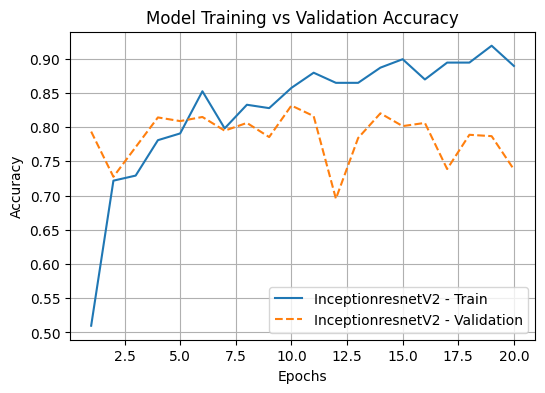

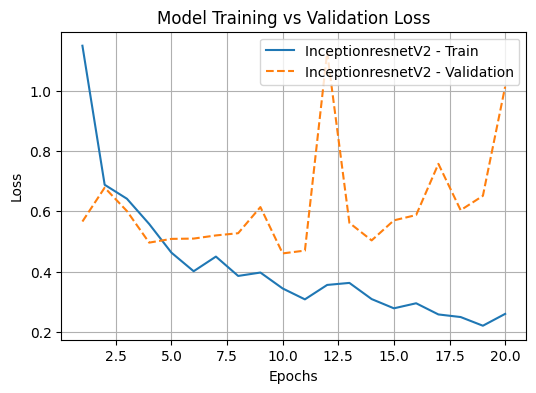

In [5]:
import pickle
import matplotlib.pyplot as plt

# 🔹 File paths
history_files = {
    "InceptionresnetV2": r'C:\Users\Milanjyoti\Desktop\lp\inceptionresnetV2_cvnew.pkl'
}

# 🔹 Load histories
histories = {}
for model_name, file_path in history_files.items():
    with open(file_path, 'rb') as f:
        histories[model_name] = pickle.load(f)

# 🔹 Plot function (restricted to 10 epochs)
def plot_metric(histories, metric, title, ylabel, max_epochs=20):
    plt.figure(figsize=(6, 4))
    
    for model_name, history in histories.items():
        train_values = history[metric][:max_epochs]
        val_values = history['val_' + metric][:max_epochs]
        
        plt.plot(range(1, len(train_values)+1), train_values, label=f'{model_name} - Train')
        plt.plot(range(1, len(val_values)+1), val_values, label=f'{model_name} - Validation', linestyle='--')
    
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# 🔹 Plot Accuracy Comparison
plot_metric(histories, metric='accuracy', title='Model Training vs Validation Accuracy' , ylabel='Accuracy')

# 🔹 Plot Loss Comparison 
plot_metric(histories, metric='loss', title='Model Training vs Validation Loss' , ylabel='Loss')

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# ---- Paths ----
train_dir = 'D:/Lung_cancer/train'
val_dir = 'D:/Lung_cancer/LC25000_sampled'
test_dir = 'D:/Lung_cancer/test'

# ---- Hyperparameters ----
batch_size = 16
dropout_rate = 0.5
learning_rate = 0.001
target_size = (299, 299)  # InceptionResNetV2 input size
num_classes = 3  # Assuming 3 classes for lung cancer

# ---- Data Preprocessing ----
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=True
)
val_generator = datagen.flow_from_directory(
    val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)
test_generator = datagen.flow_from_directory(
    test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

def build_model(base_model):
    base_model.trainable = False  # Freeze base layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs=base_model.input, outputs=output)

# ---- InceptionResNetV2 Model ----
inception_resnet_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model = build_model(inception_resnet_base)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining InceptionResNetV2 Model...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    batch_size=batch_size,
    verbose=1
)

# ---- Evaluate InceptionResNetV2 ----
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"InceptionResNetV2 Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"InceptionResNetV2 Test Loss: {test_loss:.4f}")

# Evaluate for training
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate the final model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")

import numpy as np
import pickle
# ---- Save the training history as a pickle file (.pkl) ----
history_file = 'InceptionResnetV2_cvnew.pkl'

with open(history_file, 'wb') as f:
    pickle.dump(history.history, f)

print("Model training complete and history")

Found 406 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 103 images belonging to 3 classes.

Training InceptionResNetV2 Model...
Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 259s 10s/step - accuracy: 0.4079 - loss: 1.6304 - val_accuracy: 0.6760 - val_loss: 0.6506
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.6290 - loss: 0.8086 - val_accuracy: 0.8367 - val_loss: 0.4492
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 227s 9s/step - accuracy: 0.7674 - loss: 0.5669 - val_accuracy: 0.7113 - val_loss: 0.7624
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 226s 9s/step - accuracy: 0.7586 - loss: 0.6019 - val_accuracy: 0.7987 - val_loss: 0.5167
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 226s 9s/step - accuracy: 0.7067 - loss: 0.5878 - val_accuracy: 0.8047 - val_loss: 0.4941
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 227s 9s/step - accuracy: 0.8047 - loss: 0.5205 - val_accuracy: 0.8073 - val_loss: 0.4792
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 227s 9s/step - accuracy: 0.7920 - loss

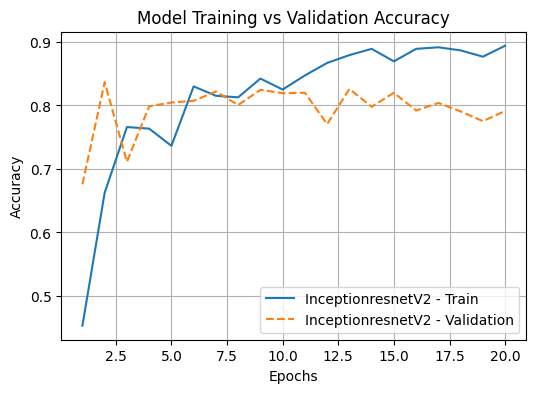

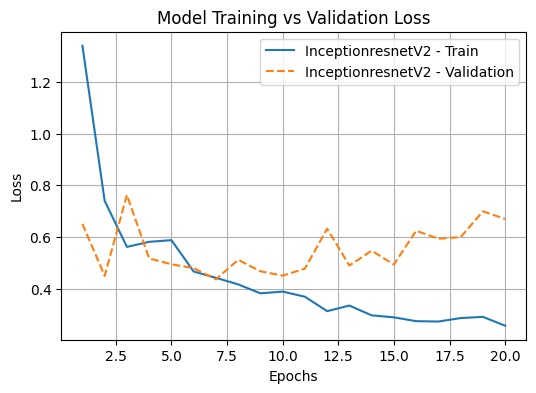

In [9]:
import pickle
import matplotlib.pyplot as plt

# 🔹 File paths
history_files = {
    "InceptionresnetV2": r'C:\Users\Milanjyoti\Desktop\lp\InceptionResnetV2_cvnew.pkl'
}

# 🔹 Load histories
histories = {}
for model_name, file_path in history_files.items():
    with open(file_path, 'rb') as f:
        histories[model_name] = pickle.load(f)

# 🔹 Plot function (restricted to 10 epochs)
def plot_metric(histories, metric, title, ylabel, max_epochs=20):
    plt.figure(figsize=(6, 4))
    
    for model_name, history in histories.items():
        train_values = history[metric][:max_epochs]
        val_values = history['val_' + metric][:max_epochs]
        
        plt.plot(range(1, len(train_values)+1), train_values, label=f'{model_name} - Train')
        plt.plot(range(1, len(val_values)+1), val_values, label=f'{model_name} - Validation', linestyle='--')
    
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# 🔹 Plot Accuracy Comparison
plot_metric(histories, metric='accuracy', title='Model Training vs Validation Accuracy' , ylabel='Accuracy')

# 🔹 Plot Loss Comparison 
plot_metric(histories, metric='loss', title='Model Training vs Validation Loss' , ylabel='Loss')

Found 406 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


Training InceptionResNetV2 Model...


C:\Users\Milanjyoti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.3870 - loss: 1.4488 - val_accuracy: 0.4660 - val_loss: 0.9803
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.5616 - loss: 1.0405 - val_accuracy: 0.6311 - val_loss: 0.7078
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.7454 - loss: 0.6086 - val_accuracy: 0.8447 - val_loss: 0.5935
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.7416 - loss: 0.5823 - val_accuracy: 0.8447 - val_loss: 0.5337
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.7875 - loss: 0.4810 - val_accuracy: 0.7961 - val_loss: 0.5390
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.8083 - loss: 0.4543 - val_accuracy: 0.8252 - val_loss: 0.5033
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.7929 - loss: 0.4536 - val_accuracy: 0.8252 - val_loss: 0.4969
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.8674 - loss: 0.4014 - val_accuracy: 0.8155 - val_loss:

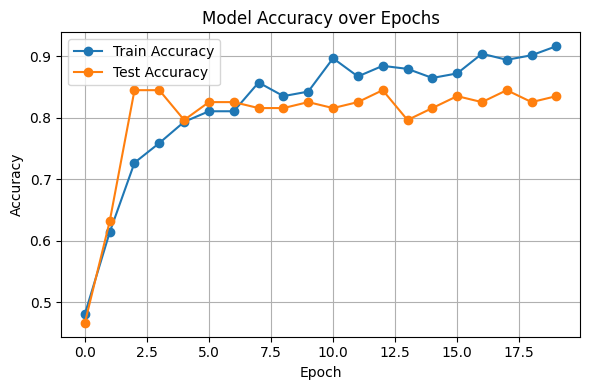

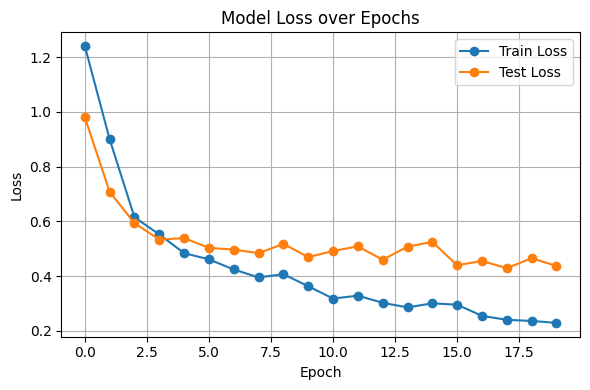

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# ---- Paths ----
train_dir = 'D:/Lung_cancer/train'
val_dir = 'D:/Lung_cancer/LC25000_sampled'
test_dir = 'D:/Lung_cancer/test'

# ---- Hyperparameters ----
batch_size = 16
dropout_rate = 0.5
learning_rate = 0.001
target_size = (299, 299)  # InceptionResNetV2 input size
num_classes = 3  # Assuming 3 classes for lung cancer

# ---- Data Preprocessing ----
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=True, seed= seed
)
val_generator = datagen.flow_from_directory(
    val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)
test_generator = datagen.flow_from_directory(
    test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

def build_model(base_model):
    base_model.trainable = False  # Freeze base layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs=base_model.input, outputs=output)

# ---- InceptionResNetV2 Model ----
inception_resnet_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model = build_model(inception_resnet_base)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining InceptionResNetV2 Model...")
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    batch_size=batch_size,
    verbose=1
)

# ---- Evaluate InceptionResNetV2 ----
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"InceptionResNetV2 Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"InceptionResNetV2 Test Loss: {test_loss:.4f}")

# Evaluate for training
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate the final model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")

import numpy as np
import pickle
# ---- Save the training history as a pickle file (.pkl) ----
history_file = 'InceptionResnetV2_cv(new).pkl'

with open(history_file, 'wb') as f:
    pickle.dump(history.history, f)

print("Model training complete and history")

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Plot Loss ----
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Test Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step
🔍 Validation Data Metrics:
                    precision    recall  f1-score   support

    Adenocarcinoma       0.84      0.53      0.65       500
               Nor       0.91      1.00      0.95       500
Squamous_carcinoma       0.70      0.90      0.79       500

          accuracy                           0.81      1500
         macro avg       0.82      0.81      0.80      1500
      weighted avg       0.82      0.81      0.80      1500

🔍 Test Data Metrics:
                    precision    recall  f1-score   support

    Adenocarcinoma       0.82      0.82      0.82        39
               Nor       0.81      0.81      0.81        31
Squamous_carcinoma       0.88      0.88      0.88        33

          accuracy                           0.83       103
         macro avg       0.84      0.84      0.84       103
      weighted avg       0.83      0.83      0.83       103

Validation Accuracy: 0.808
Va

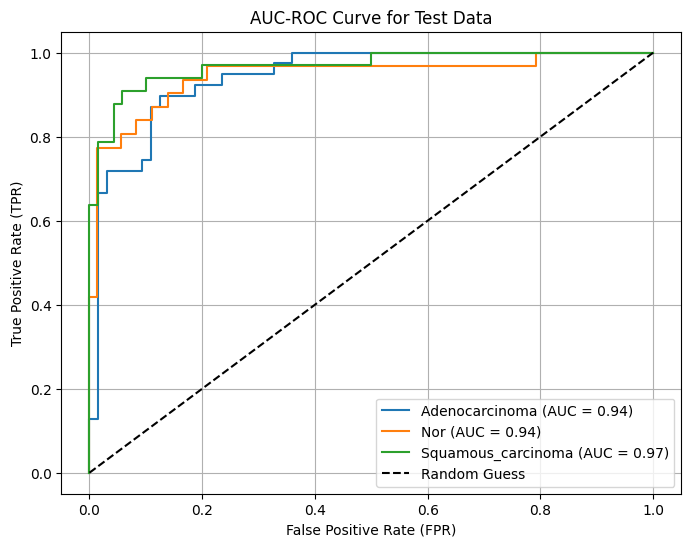


Macro-Averaged Test AUC: 0.95
94/94 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step

AUC-ROC for each class:
Adenocarcinoma - AUC: 0.88
Nor - AUC: 1.00
Squamous_carcinoma - AUC: 0.93


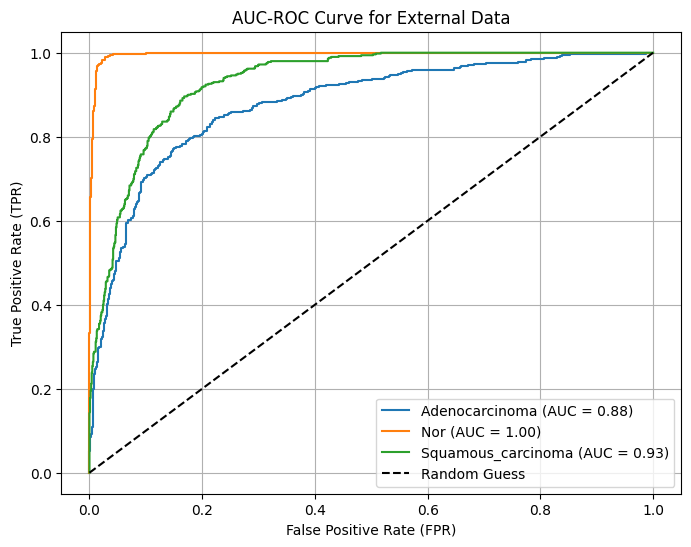


Macro-Averaged Test AUC: 0.94


In [3]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# Predicting on validation data
val_predictions = model.predict(val_generator)
val_pred_labels = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes

# Predicting on test data
test_predictions = model.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes
print("🔍 Validation Data Metrics:")
print(classification_report(val_true_labels, val_pred_labels, target_names=val_generator.class_indices.keys()))

print("🔍 Test Data Metrics:")
print(classification_report(test_true_labels, test_pred_labels, target_names=test_generator.class_indices.keys()))

# Additional individual metrics for better control
print("Validation Accuracy:", accuracy_score(val_true_labels, val_pred_labels))
print("Validation Precision:", precision_score(val_true_labels, val_pred_labels, average='weighted'))
print("Validation Recall:", recall_score(val_true_labels, val_pred_labels, average='weighted'))
print("Validation F1-Score:", f1_score(val_true_labels, val_pred_labels, average='weighted'))

print("Test Accuracy:", accuracy_score(test_true_labels, test_pred_labels))
print("Test Precision:", precision_score(test_true_labels, test_pred_labels, average='weighted'))
print("Test Recall:", recall_score(test_true_labels, test_pred_labels, average='weighted'))
print("Test F1-Score:", f1_score(test_true_labels, test_pred_labels, average='weighted'))

# Predict probabilities for the test dataset
test_predictions =model.predict(test_generator, verbose=1)

# True labels from the test generator
test_true_labels = test_generator.classes  # True class labels
class_labels = list(test_generator.class_indices.keys())  # Class names

# Binarize the true labels for multi-class
from sklearn.preprocessing import label_binarize
test_true_labels_binarized = label_binarize(test_true_labels, classes=range(len(class_labels)))

# Compute and print AUC for each class
from sklearn.metrics import roc_curve, auc

print("\nAUC-ROC for each class:")

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(test_true_labels_binarized[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"{class_labels[i]} - AUC: {roc_auc:.2f}")

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(test_true_labels_binarized[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve for Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

# Compute macro-average AUC
from sklearn.metrics import roc_auc_score
macro_roc_auc = roc_auc_score(test_true_labels_binarized, test_predictions, average="macro")
print(f"\nMacro-Averaged Test AUC: {macro_roc_auc:.2f}")

# Predict probabilities for the test dataset
val_predictions =model.predict(val_generator, verbose=1)

# True labels from the test generator
val_true_labels = val_generator.classes  # True class labels
class_labels = list(val_generator.class_indices.keys())  # Class names

# Binarize the true labels for multi-class
from sklearn.preprocessing import label_binarize
val_true_labels_binarized = label_binarize(val_true_labels, classes=range(len(class_labels)))

# Compute and print AUC for each class
from sklearn.metrics import roc_curve, auc

print("\nAUC-ROC for each class:")

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(val_true_labels_binarized[:, i], val_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"{class_labels[i]} - AUC: {roc_auc:.2f}")

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(val_true_labels_binarized[:, i], val_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve for External Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

# Compute macro-average AUC
from sklearn.metrics import roc_auc_score
macro_roc_auc = roc_auc_score(val_true_labels_binarized, val_predictions, average="macro")
print(f"\nMacro-Averaged Test AUC: {macro_roc_auc:.2f}")

Found 406 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


Training InceptionResNetV2 Model...


C:\Users\Milanjyoti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.3519 - loss: 1.6306 - val_accuracy: 0.6214 - val_loss: 0.7618
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 0.5145 - loss: 1.0580 - val_accuracy: 0.6505 - val_loss: 0.7866
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.6212 - loss: 0.8284 - val_accuracy: 0.7087 - val_loss: 0.6885
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.6450 - loss: 0.7139 - val_accuracy: 0.7476 - val_loss: 0.6471
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 0.6767 - loss: 0.7060 - val_accuracy: 0.7379 - val_loss: 0.6396
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.7233 - loss: 0.6601 - val_accuracy: 0.8155 - val_loss: 0.5974
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.7266 - loss: 0.6523 - val_accuracy: 0.7573 - val_loss: 0.6181
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.7557 - loss: 0.5802 - val_accuracy: 0.7670 - v

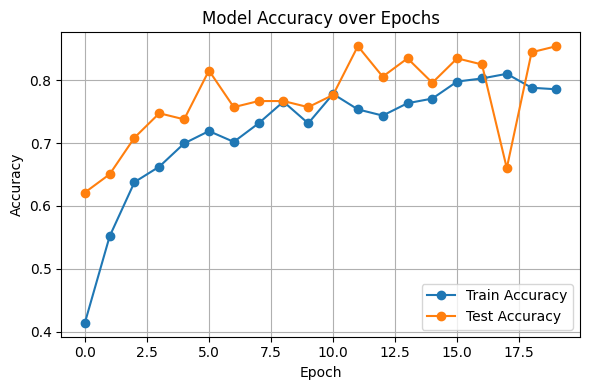

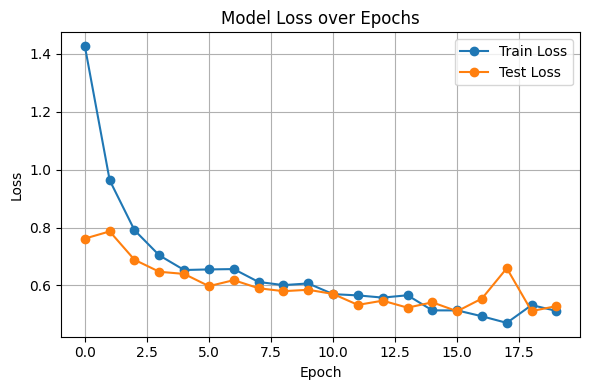

In [2]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# ---- Paths ----
train_dir = 'D:/Lung_cancer/train'
val_dir = 'D:/Lung_cancer/LC25000_sampled'
test_dir = 'D:/Lung_cancer/test'

# ---- Hyperparameters ----
batch_size = 16
dropout_rate = 0.5
learning_rate = 0.001
target_size = (299, 299)  # InceptionResNetV2 input size
num_classes = 3  # Assuming 3 classes for lung cancer

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=seed   
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

def build_model(base_model):
    base_model.trainable = False  # Freeze base layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs=base_model.input, outputs=output)

# ---- InceptionResNetV2 Model ----
inception_resnet_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model = build_model(inception_resnet_base)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining InceptionResNetV2 Model...")
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    batch_size=batch_size,
    verbose=1
)

# ---- Evaluate InceptionResNetV2 ----
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"InceptionResNetV2 Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"InceptionResNetV2 Test Loss: {test_loss:.4f}")

# Evaluate for training
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate the final model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")

import numpy as np
import pickle
# ---- Save the training history as a pickle file (.pkl) ----
history_file = 'InceptionResnetV2_cv(new).pkl'

with open(history_file, 'wb') as f:
    pickle.dump(history.history, f)

print("Model training complete and history")

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Plot Loss ----
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Test Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step
🔍 Validation Data Metrics:
                    precision    recall  f1-score   support

    Adenocarcinoma       0.77      0.62      0.68       500
               Nor       0.90      1.00      0.95       500
Squamous_carcinoma       0.75      0.82      0.78       500

          accuracy                           0.81      1500
         macro avg       0.81      0.81      0.80      1500
      weighted avg       0.81      0.81      0.80      1500

🔍 Test Data Metrics:
                    precision    recall  f1-score   support

    Adenocarcinoma       0.89      0.79      0.84        39
               Nor       0.82      0.87      0.84        31
Squamous_carcinoma       0.86      0.91      0.88        33

          accuracy                           0.85       103
         macro avg       0.85      0.86      0.85       103
      weighted avg       0.86      0.85      0.85       103

Validation Accuracy: 0.810666

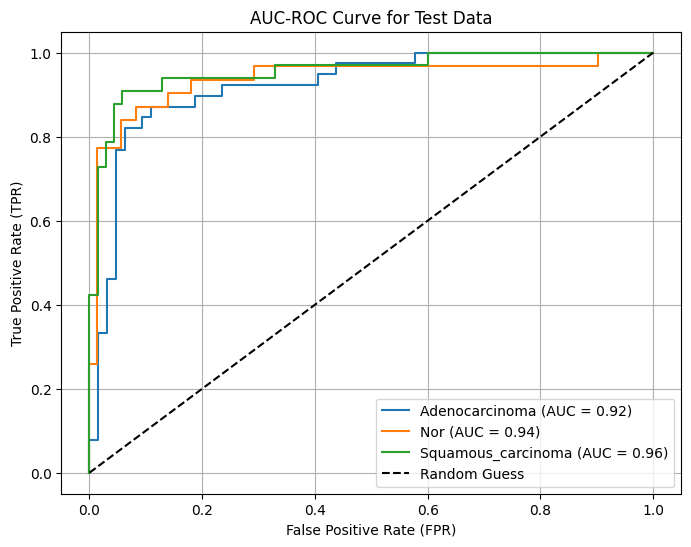


Macro-Averaged Test AUC: 0.94
94/94 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step

AUC-ROC for each class:
Adenocarcinoma - AUC: 0.88
Nor - AUC: 1.00
Squamous_carcinoma - AUC: 0.92


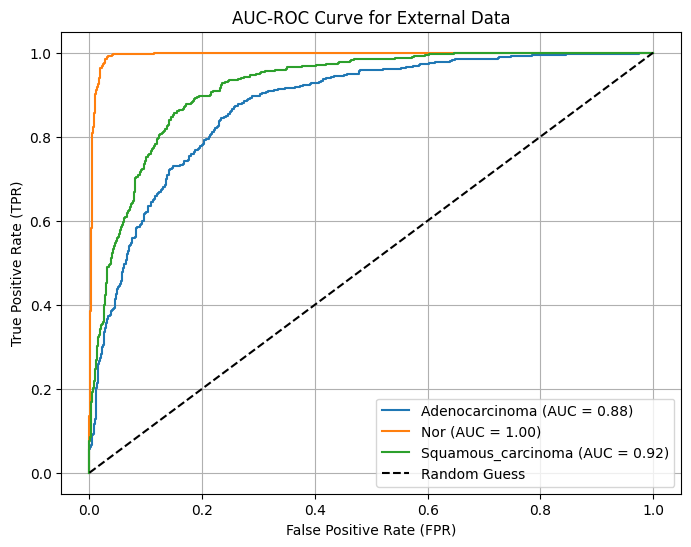


Macro-Averaged External AUC: 0.93


In [4]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# Predicting on validation data
val_predictions = model.predict(val_generator)
val_pred_labels = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes

# Predicting on test data
test_predictions = model.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes
print("🔍 Validation Data Metrics:")
print(classification_report(val_true_labels, val_pred_labels, target_names=val_generator.class_indices.keys()))

print("🔍 Test Data Metrics:")
print(classification_report(test_true_labels, test_pred_labels, target_names=test_generator.class_indices.keys()))

# Additional individual metrics for better control
print("Validation Accuracy:", accuracy_score(val_true_labels, val_pred_labels))
print("Validation Precision:", precision_score(val_true_labels, val_pred_labels, average='weighted'))
print("Validation Recall:", recall_score(val_true_labels, val_pred_labels, average='weighted'))
print("Validation F1-Score:", f1_score(val_true_labels, val_pred_labels, average='weighted'))

print("Test Accuracy:", accuracy_score(test_true_labels, test_pred_labels))
print("Test Precision:", precision_score(test_true_labels, test_pred_labels, average='weighted'))
print("Test Recall:", recall_score(test_true_labels, test_pred_labels, average='weighted'))
print("Test F1-Score:", f1_score(test_true_labels, test_pred_labels, average='weighted'))

# Predict probabilities for the test dataset
test_predictions =model.predict(test_generator, verbose=1)

# True labels from the test generator
test_true_labels = test_generator.classes  # True class labels
class_labels = list(test_generator.class_indices.keys())  # Class names

# Binarize the true labels for multi-class
from sklearn.preprocessing import label_binarize
test_true_labels_binarized = label_binarize(test_true_labels, classes=range(len(class_labels)))

# Compute and print AUC for each class
from sklearn.metrics import roc_curve, auc

print("\nAUC-ROC for each class:")

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(test_true_labels_binarized[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"{class_labels[i]} - AUC: {roc_auc:.2f}")

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(test_true_labels_binarized[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve for Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

# Compute macro-average AUC
from sklearn.metrics import roc_auc_score
macro_roc_auc = roc_auc_score(test_true_labels_binarized, test_predictions, average="macro")
print(f"\nMacro-Averaged Test AUC: {macro_roc_auc:.2f}")

# Predict probabilities for the test dataset
val_predictions =model.predict(val_generator, verbose=1)

# True labels from the test generator
val_true_labels = val_generator.classes  # True class labels
class_labels = list(val_generator.class_indices.keys())  # Class names

# Binarize the true labels for multi-class
from sklearn.preprocessing import label_binarize
val_true_labels_binarized = label_binarize(val_true_labels, classes=range(len(class_labels)))

# Compute and print AUC for each class
from sklearn.metrics import roc_curve, auc

print("\nAUC-ROC for each class:")

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(val_true_labels_binarized[:, i], val_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"{class_labels[i]} - AUC: {roc_auc:.2f}")

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(val_true_labels_binarized[:, i], val_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve for External Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

# Compute macro-average AUC
from sklearn.metrics import roc_auc_score
macro_roc_auc = roc_auc_score(val_true_labels_binarized, val_predictions, average="macro")
print(f"\nMacro-Averaged External AUC: {macro_roc_auc:.2f}")